In [46]:
import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Preprocessed file
train = pd.read_csv('./preprocess/preprocess_5.csv')

In [3]:
# Features extracted from Logistic regression model
col = ['Salary', 'Quarterly Rating', 'JoinDesignation_3', 'Designation_2',
       'Difference_Designation_1', 'Difference_Designation_2']

In [4]:
train_df = train[col + ['Emp_ID' ,'Attrition']]

In [5]:
train_df.head()

,Salary,Quarterly Rating,JoinDesignation_3,Designation_2,Difference_Designation_1,Difference_Designation_2,Emp_ID,Attrition
0,57387,2.0,0,0,0,0,1,1
1,67016,1.0,0,1,0,0,2,0
2,65603,1.0,0,1,0,0,4,1
3,46368,1.0,0,0,0,0,5,1
4,78728,1.6,1,0,0,0,6,0


In [8]:
Scaler = StandardScaler()

In [10]:
train_df[col] = Scaler.fit_transform(train_df[col])

In [11]:
train_df.head()

,Salary,Quarterly Rating,JoinDesignation_3,Designation_2,Difference_Designation_1,Difference_Designation_2,Emp_ID,Attrition
0,-0.068616,0.602773,-0.511002,-0.748524,-0.315058,-0.248994,1,1
1,0.270700,-0.787079,-0.511002,1.335962,-0.315058,-0.248994,2,0
2,0.220907,-0.787079,-0.511002,1.335962,-0.315058,-0.248994,4,1
3,-0.456914,-0.787079,-0.511002,-0.748524,-0.315058,-0.248994,5,1
4,0.683418,0.046832,1.956940,-0.748524,-0.315058,-0.248994,6,0


In [14]:
model = SVC(C=1)

In [15]:
model.fit(train_df[col], train_df['Attrition'])

SVC(C=1)

In [16]:
y_pred = model.predict(train_df[col])

In [18]:
metrics.confusion_matrix(train_df['Attrition'], y_pred)

array([[ 312,  453],
       [ 123, 1493]], dtype=int64)

In [20]:
# Accuracy
metrics.accuracy_score(train_df['Attrition'], y_pred)

0.7580848383032339

In [21]:
# F1-Score
metrics.f1_score(train_df['Attrition'], y_pred)

0.8382930937675462

In [23]:
# Creating a KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=100)

In [24]:
# Instantiating a model with cost=1
model = SVC(C=1)

In [32]:
# Computing cross-validation scores
cv_results = cross_val_score(model, train_df[col], train_df['Attrition'], cv=folds, scoring='f1')

In [33]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)

[0.83309958 0.81534091 0.82987552 0.82748948 0.86471409]


In [34]:
print(cv_results.mean())

0.8341039149086145


In [40]:
# Grid Search to find optimal hyperparameter C
params = {'C': [0.1, 1, 10, 100, 1000]}

In [41]:
model = SVC()

In [42]:
# Setup gidsearch scheme
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='f1', cv=folds, verbose=1, return_train_score=True)

In [43]:
# Fit the model
model_cv.fit(train_df[col], train_df['Attrition'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='f1', verbose=1)

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.136644,0.016579,0.063043,0.000758,0.1,{'C': 0.1},0.821282,0.817056,0.847914,0.825789,...,0.832542,0.013978,2,0.842930,0.843003,0.836615,0.839213,0.829887,0.838330,0.004858
1,0.131037,0.005559,0.059648,0.000985,1,{'C': 1},0.833100,0.815341,0.829876,0.827489,...,0.834104,0.016442,1,0.842802,0.846342,0.838021,0.842987,0.833851,0.840801,0.004371
2,0.200067,0.017397,0.059440,0.002053,10,{'C': 10},0.827004,0.809728,0.834031,0.827684,...,0.832404,0.017549,3,0.843466,0.847972,0.838941,0.842661,0.834904,0.841589,0.004407
3,0.819212,0.240082,0.059826,0.001407,100,{'C': 100},0.829337,0.802878,0.834031,0.830508,...,0.831099,0.017735,4,0.848295,0.849595,0.842669,0.847872,0.839185,0.845523,0.003952
4,4.468644,0.889395,0.054659,0.001142,1000,{'C': 1000},0.829545,0.805195,0.834019,0.816619,...,0.828986,0.018324,5,0.848273,0.851499,0.846757,0.849248,0.842697,0.847695,0.002935


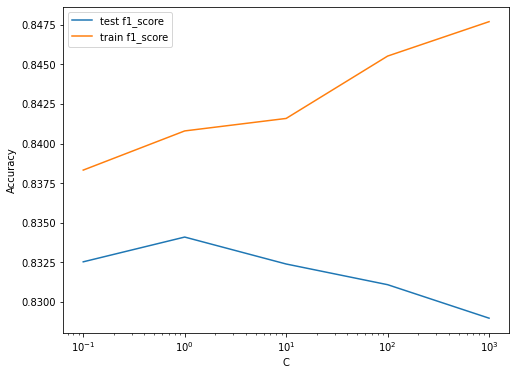

In [48]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test f1_score', 'train f1_score'], loc='upper left')
plt.xscale('log')

In [56]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print('Highest F1_Score is', round(best_score,2), ' at C=',best_C)

Highest F1_Score is 0.83  at C= 1


In [62]:
# Model with best value of C
model = SVC(C=best_C, probability=True)

In [63]:
# Fit
model.fit(train_df[col], train_df['Attrition'])

SVC(C=1, probability=True)

In [59]:
y_pred = model.predict(train_df[col])


In [60]:
metrics.f1_score(train_df['Attrition'], y_pred)

0.8382930937675462

In [64]:
y_pred_prob = model.predict_proba(train_df[col])

In [66]:
y_pred_df = pd.DataFrame(y_pred_prob)
y_pred_df.head()

,0,1
0,0.231781,0.768219
1,0.220624,0.779376
2,0.220627,0.779373
3,0.220492,0.779508
4,0.600842,0.399158


In [67]:
y_pred_1 = y_pred_df[[1]]
y_pred_1.head()

,1
0,0.768219
1,0.779376
2,0.779373
3,0.779508
4,0.399158


In [74]:
y_pred_final = pd.concat([train_df['Attrition'] , pd.DataFrame({'y_pred':y_pred}),  y_pred_1], 1)
y_pred_final.head()

,Attrition,y_pred,1
0,1,1,0.768219
1,0,1,0.779376
2,1,1,0.779373
3,1,1,0.779508
4,0,0,0.399158


In [76]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_pred_final[i] = y_pred_final[1].map(lambda x:1 if x>i else 0)
    

In [77]:
y_pred_final.head()

,Attrition,y_pred,1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1,0.768219,1,1,1,1,1,1,1,1,0,0
1,0,1,0.779376,1,1,1,1,1,1,1,1,0,0
2,1,1,0.779373,1,1,1,1,1,1,1,1,0,0
3,1,1,0.779508,1,1,1,1,1,1,1,1,0,0
4,0,0,0.399158,1,1,1,1,0,0,0,0,0,0


In [89]:
cutoff_df = pd.DataFrame(columns=['Prob', 'accuracy','recall', 'preci', 'f1_score'])
for i in numbers:
    cm1 = metrics.confusion_matrix(y_pred_final['Attrition'], y_pred_final[i])
    total1 = sum(sum(cm1))
    #accuracy = (cm1[0,0] + cm1[1,1])/ total1
    accuracy = metrics.accuracy_score(y_pred_final['Attrition'], y_pred_final[i])
    #sensi = cm1[1,1]/(cm1[1,1] + cm1[1,0])
    recall = metrics.recall_score(y_pred_final['Attrition'], y_pred_final[i])
    #speci = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    #preci = cm1[1,1]/(cm1[1,1] + cm1[0,1])
    preci = metrics.precision_score(y_pred_final['Attrition'], y_pred_final[i])
    #f1_score = 2*(preci*sensi)/(preci+sensi)
    f1_score = metrics.f1_score(y_pred_final['Attrition'], y_pred_final[i])
    cutoff_df.loc[i] = [i, accuracy, recall, preci, f1_score]
print(cutoff_df)

     Prob  accuracy    recall     preci  f1_score
0.0   0.0  0.678706  1.000000  0.678706  0.808606
0.1   0.1  0.678286  0.999381  0.678571  0.808308
0.2   0.2  0.715246  0.982673  0.709562  0.824079
0.3   0.3  0.746745  0.966584  0.739934  0.838208
0.4   0.4  0.755985  0.948639  0.754801  0.840691
0.5   0.5  0.757665  0.922030  0.767646  0.837785
0.6   0.6  0.760605  0.898515  0.781485  0.835924
0.7   0.7  0.751785  0.860149  0.792023  0.824681
0.8   0.8  0.366653  0.069307  0.965517  0.129330
0.9   0.9  0.328853  0.011139  1.000000  0.022032


<AxesSubplot:xlabel='Prob'>

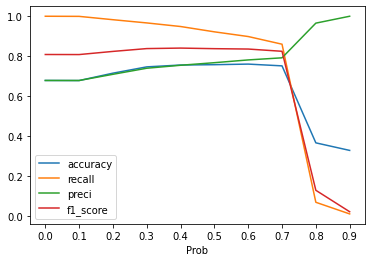

In [90]:
cutoff_df.plot.line(x='Prob', y=['accuracy', 'recall', 'preci','f1_score'], xticks = cutoff_df['Prob'])

In [93]:
# F1 Score and Precision is maximum at 0.7 probability
y_pred_final['final_predicted'] = y_pred_final[1].apply(lambda x:1 if x>=0.6 else 0)
y_pred_final.head()

,Attrition,y_pred,1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,1,0.768219,1,1,1,1,1,1,1,1,0,0,1
1,0,1,0.779376,1,1,1,1,1,1,1,1,0,0,1
2,1,1,0.779373,1,1,1,1,1,1,1,1,0,0,1
3,1,1,0.779508,1,1,1,1,1,1,1,1,0,0,1
4,0,0,0.399158,1,1,1,1,0,0,0,0,0,0,0
